In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from math import sqrt
from scipy import stats

In [2]:
os.chdir('C:\\Users\\LENOVO\\Desktop\\VIT hack-a-thon\\chennai rainfall')

In [3]:
import pickle

In [4]:
filename = 'population_pred_model'
linear_model = pickle.load(open(filename, 'rb'))
linear_model

LinearRegression()

In [5]:
df = pd.read_csv("csvData.csv")

In [6]:
data = df[['Year', 'GrowthRate', 'Growth', 'Population']]
data.shape

(14, 4)

In [7]:
X = data.loc[:,:'Growth']

In [8]:
X.shape

(14, 3)

In [9]:
for col in X.columns:
    X[col].fillna(X[col].median(), inplace=True)

In [10]:
X.isna().sum()

Year          0
GrowthRate    0
Growth        0
dtype: int64

In [11]:
prediction = linear_model.predict(X)

In [12]:
prediction

array([563598.38183337, 560493.82623629, 556239.54683143, 550278.70835883,
       542905.7525248 , 533143.21362771, 520137.81227898, 502499.46405869,
       479649.30095909, 450786.12177914, 416226.40097291, 376995.67632573,
       335345.32366004, 294055.51171887])

In [13]:
prediction[:10].round(2)

array([563598.38, 560493.83, 556239.55, 550278.71, 542905.75, 533143.21,
       520137.81, 502499.46, 479649.3 , 450786.12])

In [14]:
data['Growth'][:10]

0    562956
1    559856
2    555608
3    549656
4    542294
5    532546
6    519560
7    501948
8    479132
9    450312
Name: Growth, dtype: int64

In [15]:
len(X)

14

In [16]:
len(prediction)

14

In [17]:
df.head(1)

,Year,Population,GrowthRate,Growth
0,2035,27342820,0.021,562956


In [18]:
df = df.drop(labels='Growth', axis=1)

In [19]:
df['Predicted Growth'] = prediction.round(2)

In [20]:
df

,Year,Population,GrowthRate,Predicted Growth
0,2035,27342820,0.0210,563598.38
1,2034,26779864,0.0214,560493.83
2,2033,26220008,0.0216,556239.55
3,2032,25664400,0.0219,550278.71
4,2031,25114744,0.0221,542905.75
5,2030,24572450,0.0222,533143.21
6,2029,24039904,0.0221,520137.81
7,2028,23520344,0.0218,502499.46
8,2027,23018396,0.0213,479649.30
9,2026,22539264,0.0204,450786.12


In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Predicted Growth', ylabel='Year'>

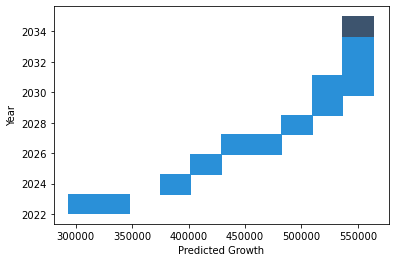

In [29]:
sns.histplot(x=df['Predicted Growth'],y=df['Year'], bins=10)